In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
X_train = np.genfromtxt('binMNIST_data/bindigit_trn.csv', delimiter=',')
X_test = np.genfromtxt('binMNIST_data/bindigit_tst.csv', delimiter=',')
y_train = np.genfromtxt('binMNIST_data/targetdigit_trn.csv', delimiter=',')
y_test = np.genfromtxt('binMNIST_data/targetdigit_tst.csv', delimiter=',')

In [4]:
def plotWeights(weights):
    n = weights.shape[0]  # how many digits we will display
    l = weights.shape[1]
    dim = int(math.sqrt(l))
    
    plt.figure(figsize=(20, 20))
    for i in range(n):
        # display weights
        ax = plt.subplot(10, 10, i + 1)
        plt.imshow(weights[i][:l].reshape(dim, dim))
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [5]:
input_img = Input(shape=(784,))
encoded1 = Dense(121, activation='relu')(input_img) #1st hidden layer
encoded2 = Dense(81, activation='relu')(encoded1) #2nd hidden layer
encoded3 = Dense(49, activation='relu')(encoded2) #3d hidden layer
decoded1 = Dense(81, activation='relu')(encoded3)
decoded2 = Dense(121, activation='relu')(decoded1)
decoded3 = Dense(784, activation='sigmoid')(decoded2)

autoencoder = Model(input_img,decoded3)

autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [6]:
autoencoder.fit(X_train,X_train,
               epochs=20,
               batch_size=64,
               shuffle=True,
               verbose=0,
                validation_data=(X_test, X_test))

In [7]:
y_train = to_categorical(y_train, num_classes=10)

## 1 hidden layer

In [8]:
#hidden1 = Dense(50, activation='relu')(encoded1)
out1 = Dense(10, activation='sigmoid')(encoded1)
classifier1 = Model(input_img,out1)
classifier1.compile(optimizer='adadelta', loss='mean_squared_error')

In [9]:
classifier1.fit(X_train,y_train,
               epochs=50,
               batch_size=64,
               shuffle=True,
               verbose=0)

In [10]:
predictions1 = classifier1.predict(X_test)
predictions1 = np.argmax(predictions1, axis=1)


In [11]:
print("Classification using one hidden layer:\n%s\n" %
      classification_report(y_test,predictions1))

print("Accuracy:",accuracy_score(y_test,predictions1))
print("\n")

Classification using one hidden layer:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       196
         1.0       0.97      0.97      0.97       227
         2.0       0.92      0.93      0.92       206
         3.0       0.95      0.88      0.91       202
         4.0       0.94      0.97      0.95       196
         5.0       0.92      0.89      0.90       182
         6.0       0.93      0.97      0.95       191
         7.0       0.95      0.93      0.94       205
         8.0       0.94      0.93      0.94       194
         9.0       0.92      0.94      0.93       201

   micro avg       0.94      0.94      0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000


Accuracy: 0.94




## 2 hidden layers

In [12]:
#hidden2 = Dense(50, activation='relu')(encoded2)
out2 = Dense(10, activation='sigmoid')(encoded2)
classifier2 = Model(input_img,out2)
classifier2.compile(optimizer='adadelta', loss='mean_squared_error')

In [13]:
classifier2.fit(X_train,y_train,
               epochs=50,
               batch_size=64,
               shuffle=True,
               verbose=0)

In [14]:
predictions2 = classifier2.predict(X_test)
predictions2 = np.argmax(predictions2, axis=1)


In [14]:
print("Classification using two hidden layers:\n%s\n" %
      classification_report(y_test,predictions2))

print("Accuracy:",accuracy_score(y_test,predictions2))
print("\n")

Classification using two hidden layers:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       196
         1.0       0.97      0.97      0.97       227
         2.0       0.95      0.93      0.94       206
         3.0       0.97      0.90      0.93       202
         4.0       0.96      0.97      0.97       196
         5.0       0.91      0.92      0.92       182
         6.0       0.94      0.97      0.95       191
         7.0       0.95      0.94      0.95       205
         8.0       0.95      0.94      0.95       194
         9.0       0.93      0.96      0.94       201

   micro avg       0.95      0.95      0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000


Accuracy: 0.949




## 3 hidden layers

In [15]:
#hidden3 = Dense(50, activation='relu')(encoded3)
out3 = Dense(10, activation='sigmoid')(encoded3)
classifier3 = Model(input_img,out3)
classifier3.compile(optimizer='adadelta', loss='mean_squared_error')

In [16]:
classifier3.fit(X_train,y_train,
               epochs=50,
               batch_size=64,
               shuffle=True,
               verbose=0)

In [17]:
predictions3 = classifier3.predict(X_test)
predictions3 = np.argmax(predictions3, axis=1)


In [18]:
print("Classification using three hidden layers:\n%s\n" %
      classification_report(y_test,predictions3))

print("Accuracy:",accuracy_score(y_test,predictions3))
print("\n")

Classification using three hidden layers:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       196
         1.0       0.97      0.98      0.98       227
         2.0       0.96      0.93      0.95       206
         3.0       0.96      0.90      0.93       202
         4.0       0.96      0.97      0.97       196
         5.0       0.93      0.90      0.92       182
         6.0       0.94      0.97      0.96       191
         7.0       0.95      0.96      0.95       205
         8.0       0.93      0.94      0.93       194
         9.0       0.93      0.97      0.95       201

   micro avg       0.95      0.95      0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000


Accuracy: 0.9505




## Plot weights

In [19]:
w1 = classifier1.get_weights()
w2 = classifier2.get_weights()
w3 = classifier3.get_weights()

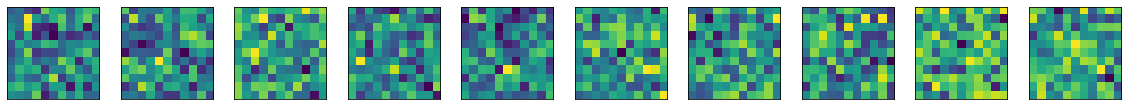

In [20]:
plotWeights(w1[2].T)

(121, 10)

In [ ]:
n = w1.shape[0]  # how many digits we will display
l = w1.shape[1]
#dim = int(math.sqrt(l))


plt.figure(figsize=(20, 20))
for i in range(n):
    # display weights
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(weights[i][:l].reshape(dim, dim))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

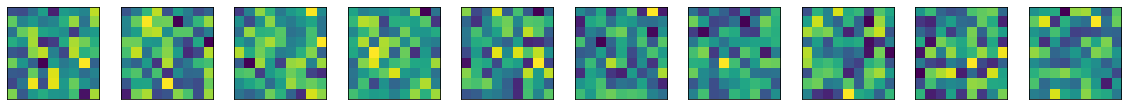

In [21]:
plotWeights(w2[4].T)

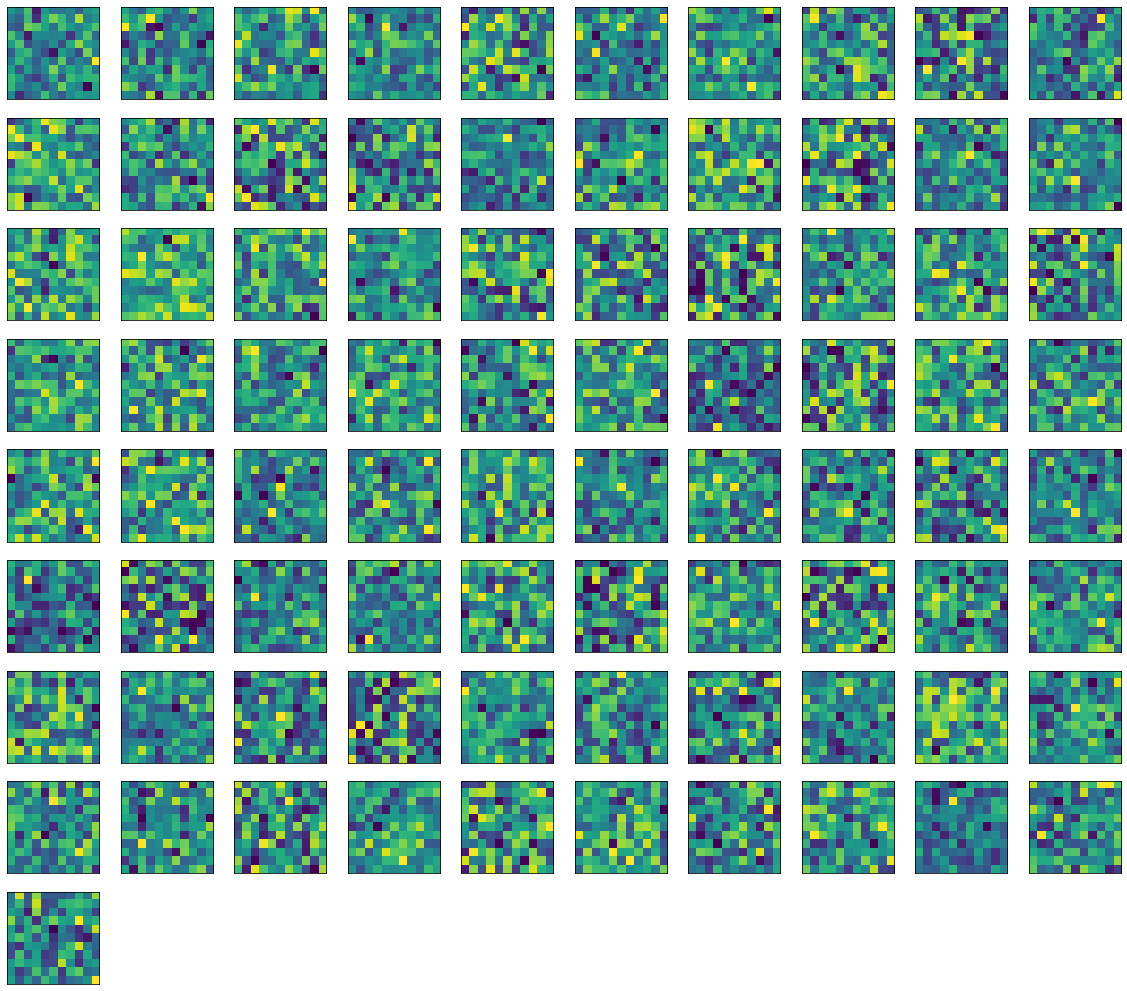

In [29]:
plotWeights(w2[2].T)

In [28]:
w22t = w2[2].T

n = w22t.shape[0]  #how many digits we will display
l = w22t.shape[1]
#dim = int(math.sqrt(l))

plt.figure(figsize=(20, 20))
for i in range(n):
    # display weights
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(weights[i][:l].reshape(11, 11))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

(121, 81)

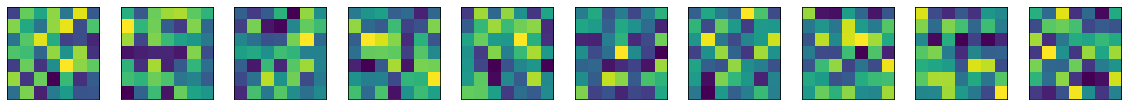

In [24]:
plotWeights(w3[6].T)

## Compare with scikit MLPClassifier

In [28]:
clf = MLPClassifier(batch_size='auto', 
                    alpha=1e-5,
                    hidden_layer_sizes=[120,],
                    early_stopping=True,
                    activation='relu'
                   )


In [29]:
clf.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=[120], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [30]:
clf_pred = clf.predict(X_test)

In [32]:
clf_pred = np.argmax(clf_pred,axis=1)

In [34]:
print("Classification using :\n%s\n" %
      classification_report(y_test,clf_pred))

print("Accuracy:",accuracy_score(y_test,clf_pred))
print("\n")

Classification using NN:
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79       196
         1.0       0.96      0.96      0.96       227
         2.0       0.96      0.89      0.93       206
         3.0       0.97      0.87      0.92       202
         4.0       0.95      0.92      0.94       196
         5.0       0.94      0.84      0.89       182
         6.0       0.97      0.95      0.96       191
         7.0       0.96      0.89      0.92       205
         8.0       0.98      0.88      0.92       194
         9.0       0.94      0.93      0.93       201

   micro avg       0.91      0.91      0.91      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.91      0.92      2000


Accuracy: 0.913


